# Neuronas lineales adaptativas (ADALINE)

El algoritmo **Adaline** (Adaptive Linear Neuron) es particularmente interesante porque ilustra conceptos fundamentales en el aprendizaje automático, como la definición y minimización de funciones de coste continuas. Estos conceptos son esenciales para entender algoritmos más avanzados de clasificación, como la **regresión logística**, las **máquinas de vectores de soporte** (SVM) y los modelos de regresión.

## Diferencias entre Adaline y el Perceptrón

Una diferencia clave entre **Adaline** y el **perceptrón de Rosenblatt** radica en cómo se actualizan los pesos. Mientras que el perceptrón utiliza una función de activación basada en un **escalón unitario**, Adaline utiliza una **función de activación lineal**. En Adaline, la actualización de los pesos se realiza después de evaluar todo el conjunto de datos, mientras que en el perceptrón, los pesos se actualizan tras cada muestra de entrenamiento. Este enfoque en Adaline se conoce como **descenso de gradiente en lotes**, ya que se ajustan los pesos considerando todas las muestras de una vez.

En Adaline, la función de activación lineal, representada por $\phi(z)$, es simplemente el producto escalar de los pesos y las entradas de la red:
$$
\phi\left(\mathbf{w}^T\mathbf{x}\right) = \mathbf{w}^T\mathbf{x}
$$
Mientras que esta función de activación lineal se emplea para ajustar los pesos, el algoritmo sigue utilizando una **función umbral** para realizar la predicción final, que es similar a la función escalón del perceptrón. Es decir, aunque los pesos se ajustan basándose en valores continuos, la predicción final será una etiqueta de clase discreta (por ejemplo, +1 o -1), utilizando una función umbral que se aplica sobre la salida lineal.

**Adaline** compara las etiquetas verdaderas de las clases con los valores continuos generados por la función de activación lineal para calcular el error. Esta es otra diferencia importante respecto al perceptrón, que compara directamente las etiquetas verdaderas con las etiquetas de clase predichas.

## Minimizar la función de coste con el descenso del gradiente

En Adaline, la función de coste se define como la **Suma de Errores Cuadráticos (SSE)** entre la salida calculada y la etiqueta de clase verdadera:
$$
J(\mathbf{w}) = \frac{1}{2} \sum_i \left( y^{(i)} - \phi\left(z^{(i)}\right) \right)^2
$$
Esta función de coste es convexa y diferenciable, lo que permite aplicar el algoritmo de **descenso del gradiente** para minimizarla. El objetivo es encontrar los pesos que minimicen esta función de coste ajustando los pesos actuales:
$$
\mathbf{w} := \mathbf{w} + \Delta\mathbf{w}
$$
donde $\Delta\mathbf{w}$ representa el cambio en los pesos, calculado como el **gradiente negativo** multiplicado por la tasa de aprendizaje $\eta$:
$$
\Delta\mathbf{w} = -\eta \nabla J(\mathbf{w})
$$
El gradiente de la función de coste se obtiene calculando la derivada parcial con respecto a cada peso $w_j$:
$$
\frac{\partial J}{\partial w_j} = -\sum_i \left( y^{(i)} - \phi\left(z^{(i)}\right) \right) x_j^{(i)}
$$
Esto lleva a la expresión del gradiente:
$$
\nabla J(\mathbf{w}) = - \left( \mathbf{y} - \phi(\mathbf{z}) \right)^T X
$$
donde $X$ es la matriz de datos de entrada, cuyas filas son las muestras de entrenamiento.

Finalmente, el cambio en los pesos se expresa como:
$$
\Delta\mathbf{w} = \eta \left( \mathbf{y} - \phi(\mathbf{z}) \right)^T X
$$
y los pesos se actualizan con la fórmula:
$$
\mathbf{w} := \mathbf{w} + \eta \left( \mathbf{y} - \phi(\mathbf{z}) \right)^T X
$$

Aunque superficialmente la regla de aprendizaje de Adaline puede parecer similar a la del perceptrón, la diferencia radica en que $\phi\left(z^{(i)}\right)$ es un valor continuo y no una etiqueta de clase categórica. Además, la actualización de los pesos en Adaline se realiza evaluando todo el conjunto de datos, mientras que en el perceptrón, los pesos se ajustan después de procesar cada muestra de manera incremental. Esto hace que Adaline utilice el enfoque de **descenso de gradiente en lotes**, una técnica más robusta que facilita la convergencia en problemas donde la función de coste es continua, diferenciable y convexa.

## Resumen

En resumen, **Adaline** constituye un importante paso hacia algoritmos más sofisticados de aprendizaje automático y permite el uso de métodos optimizados como el descenso del gradiente para ajustar los parámetros de los modelos de manera eficiente. La capacidad de definir y minimizar una función de coste diferenciable hace que Adaline sea una base fundamental para comprender los algoritmos más avanzados utilizados hoy en día en clasificación y regresión.

### Implementación del algoritmo

In [1]:
import numpy as np

class AdalineGD:
    """
    AdalineGD (Adaline Gradiente Descendente).
    Modelo de Adaline que utiliza el algoritmo de descenso del gradiente.

    Parámetros:
    -----------
    eta : float, opcional, default=0.01
        Tasa de aprendizaje (step size).
    n_iter : int, opcional, default=50
        Número de iteraciones (epochs) sobre el dataset de entrenamiento.
    random_state : int, opcional, default=1
        Semilla para la generación de números aleatorios para la inicialización de los pesos.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # Tasa de aprendizaje
        self.n_iter = n_iter  # Número de iteraciones
        self.random_state = random_state  # Semilla para reproducibilidad

    def fit(self, X, y):
        """
        Ajusta el modelo a los datos de entrenamiento.

        Parámetros:
        -----------
        X : array-like, shape = [n_samples, n_features]
            Matriz con las características de entrenamiento.
        y : array-like, shape = [n_samples]
            Vector con las etiquetas de entrenamiento (objetivo).

        Devuelve:
        ---------
        self : objeto AdalineGD
            Modelo entrenado.
        """

        # Generador de números aleatorios para inicializar los pesos de forma reproducible
        rgen = np.random.RandomState(self.random_state)
        # Inicialización de pesos pequeños cercanos a 0 (1 más que el número de características debido al término de sesgo)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []  # Lista para almacenar los costos de cada iteración

        # Bucle de entrenamiento (descenso por gradiente)
        for i in range(self.n_iter):
            net_input = self.net_input(X)  # Cálculo de la entrada neta
            output = self.activation(net_input)  # Cálculo de la salida del modelo
            errors = (y - output)  # Cálculo del error entre la salida esperada y la real
            # Actualización de los pesos: w_1, w_2, ..., w_m
            self.w_[1:] += self.eta * X.T.dot(errors)
            # Actualización del sesgo (w_0)
            self.w_[0] += self.eta * errors.sum()
            # Cálculo del coste basado en el error cuadrático medio
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)  # Almacenar el coste de esta iteración
        return self  # Devolver el modelo entrenado

    def net_input(self, X):
        """
        Calcula la entrada neta.

        Parámetros:
        -----------
        X : array-like, shape = [n_samples, n_features]
            Matriz con las características.

        Devuelve:
        ---------
        net_input : float
            Suma ponderada de las características más el sesgo.
        """

        # Producto punto entre las características X y los pesos w_ (excepto w_0) más el sesgo w_0
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """
        Función de activación lineal. En Adaline, la función de activación es simplemente la identidad.

        Parámetros:
        X : float
            Valor de entrada neta.

        Devuelve:
        X : float
            La salida sin cambios, ya que en Adaline la activación es una función identidad.
        """
        return X  # La activación es lineal, así que se devuelve el valor de entrada neta sin cambios

    def predict(self, X):
        """
        Predice las etiquetas de las muestras dadas.

        Parámetros:
        -----------
        X : array-like, shape = [n_samples, n_features]
            Matriz con las características de prueba.

        Devuelve:
        ---------
        labels : array, shape = [n_samples]
            Etiquetas predichas (1 o -1).
        """
        # Predicción del valor basado en el signo de la entrada neta
        # Si la entrada neta es >= 0, predice 1; si es < 0, predice -1
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Observa que el método `activation` no modifica los resultados del modelo, ya que es una función identidad. Sin embargo, lo hemos incluido para ilustrar el flujo de información en una red neuronal de una sola capa, siguiendo el proceso típico: desde las características de los datos de entrada, se calcula la entrada neta, luego se aplica la función de activación y, finalmente, se obtiene la salida del modelo. Aunque aquí la activación es lineal, veremos más adelante cómo el clasificador de regresión logística utiliza una activación no lineal. En efecto, el modelo de regresión logística y Adaline están estrechamente relacionados, diferenciándose principalmente en sus funciones de activación y de coste.

Similar a la implementación del perceptrón, registramos los valores de la función de coste en una lista, `self.cost_`, para monitorizar el comportamiento del algoritmo durante el entrenamiento. Esto permite evaluar si el algoritmo está convergiendo adecuadamente, es decir, si los errores disminuyen progresivamente a lo largo de las iteraciones. Al analizar `self.cost_`, podemos determinar si el modelo ha alcanzado un mínimo en la función de coste, lo cual indicaría que está aprendiendo de manera efectiva a partir de los datos.

En la práctica, ajustar la tasa de aprendizaje, $\eta$, es fundamental para una convergencia óptima, y a menudo requiere experimentación. Por lo tanto, probaremos con distintos valores, como $\eta = 0.1$ y $\eta = 0.0001$, y visualizaremos las funciones de coste frente al número de épocas para observar cómo el modelo Adaline aprende de los datos de entrenamiento.

### Cargar dataset Iris

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Seleccionar setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

# Extraer longitud de sépalo y longitud de pétalo
X = df.iloc[0:100, [0, 2]].values

Ahora veamos en un diagrama el coste contra el número de épocas para los dos rangos de aprendizaje.

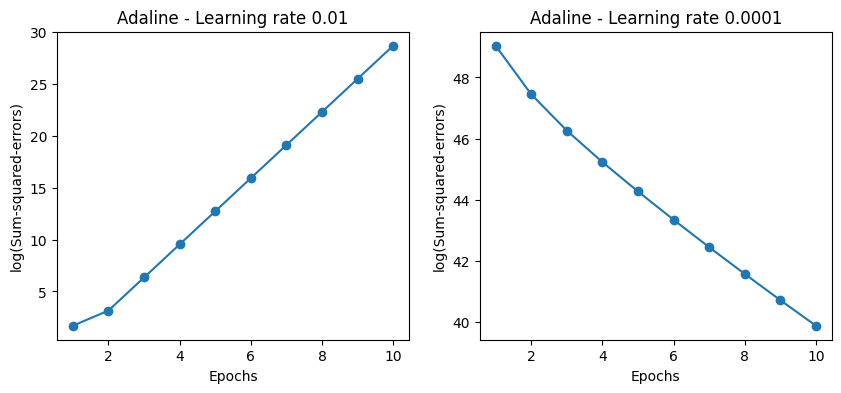

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-errors)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-errors)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()